# Linear regression with one variable


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Try to estimate the $2x + 1 + e$ function with a linear regression model. $e$ is a random error.


In [2]:
# tensor of X (vector of 50 numbers from 1 to 50)
X = torch.linspace(1, 50, 50).reshape(-1, 1)
torch.manual_seed(71)
# random error
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)
# tensor of y
y = 2*X + 1 + e

## Plot the data
The plot of the equation with random error. We will try to fit these data with linear regression.

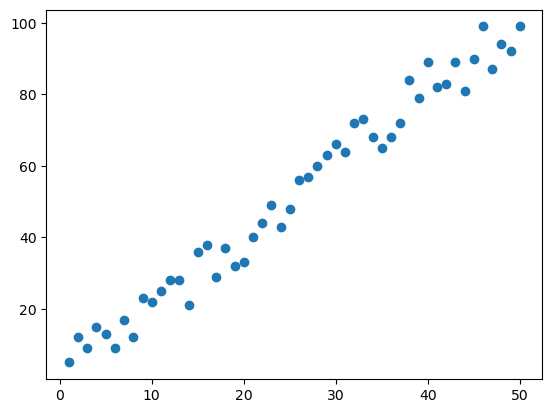

In [3]:
plt.scatter(X.numpy(), y.numpy())

## Linear model
Weight and bias are initialized with random values. 

In [4]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


## Model class
The model class is defined with the forward method. The forward method is the equation of the line.


In [5]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [6]:
torch.manual_seed(59)
model = Model(1, 1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [7]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [8]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [9]:
x1 = np.linspace(0.0, 50.0, 50)
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

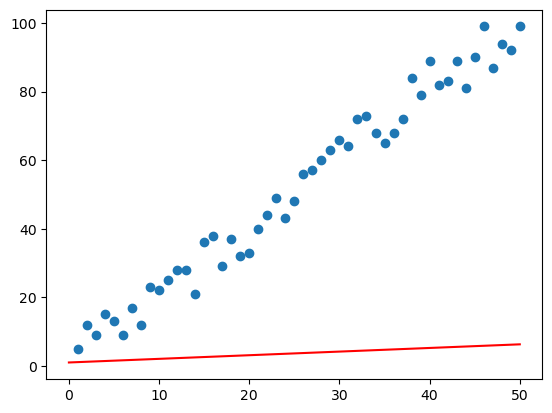

In [10]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

## Loss function

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
epoch = 50
losses = []

for i in range(epoch):
    i = i + 1
    # prediction of y
    y_pred = model.forward(X)
    # calculate loss
    loss = criterion(y_pred, y)
    print('epoch: ', i, 'loss: ', loss.item(), 'weight: ', model.linear.weight.item(), 'bias: ', model.linear.bias.item())
    # save loss
    losses.append(loss)
    # reset gradient to zero
    optimizer.zero_grad()
    loss.backward()
    # update weight and bias
    optimizer.step()

epoch:  1 loss:  3057.216796875 weight:  0.10597813129425049 bias:  0.9637961387634277
epoch:  2 loss:  1588.5311279296875 weight:  3.334900379180908 bias:  1.0604636669158936
epoch:  3 loss:  830.2999877929688 weight:  1.0148327350616455 bias:  0.9922628402709961
epoch:  4 loss:  438.8524169921875 weight:  2.6817996501922607 bias:  1.0425218343734741
epoch:  5 loss:  236.7615203857422 weight:  1.4840211868286133 bias:  1.0076650381088257
epoch:  6 loss:  132.4291229248047 weight:  2.3446059226989746 bias:  1.0339646339416504
epoch:  7 loss:  78.56572723388672 weight:  1.7262253761291504 bias:  1.0163217782974243
epoch:  8 loss:  50.75775909423828 weight:  2.170504093170166 bias:  1.0302516222000122
epoch:  9 loss:  36.4012565612793 weight:  1.851245641708374 bias:  1.0214954614639282
epoch:  10 loss:  28.989229202270508 weight:  2.0806007385253906 bias:  1.029038906097412
epoch:  11 loss:  25.162382125854492 weight:  1.9157683849334717 bias:  1.0248701572418213
epoch:  12 loss:  23.18

range(0, 50)
50
3057.216796875


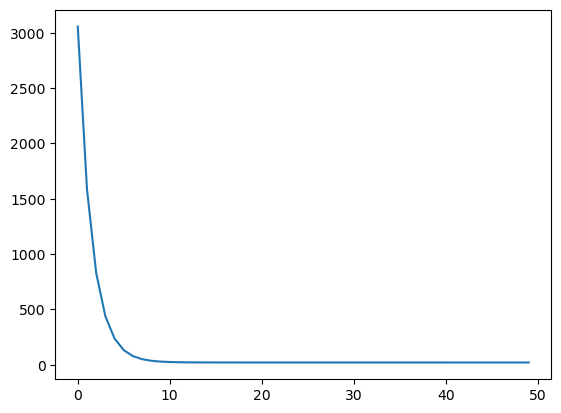

In [27]:
print(range(epoch))
print(len(losses))
#torch.detach(losses)
lss = []
for i in range(len(losses)):
    lss.append(losses[i].item())
    
print(losses[0].item())
ep = np.arange(1, epoch+1)
plt.plot(range(epoch), lss)

#plt.plot([0,50], losses)
#plt.ylabel('Loss')
#plt.xlabel('epoch')


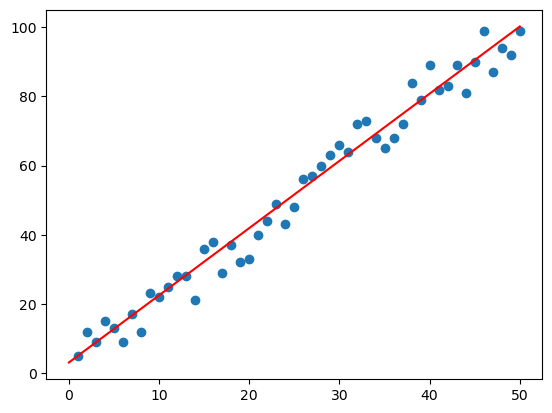

In [29]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*X + current_bias

plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')